In [834]:
### IMPORTS

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [835]:
df = pd.read_csv("../TerrablueXT/allfeatures.csv")

In [836]:
df.head(10)

,Unnamed: 0,sdnn,pnn50,rmssd,lf,hf,lfhf,sd1/sd2,Class
0,1,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.322117,A
1,2,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.261561,A
2,3,161.341067,44.251683,83.978694,5116.245854,1149.991293,4.448943,0.290226,A
3,4,150.306617,36.904762,81.739520,4486.273031,1990.905949,2.253383,0.283063,N
4,5,238.836996,41.322314,102.662892,5023.556550,2027.037377,2.478275,0.268786,N
5,6,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.814668,A
6,7,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.835115,A
7,8,161.341067,44.251683,83.978694,5116.245854,1149.991293,4.448943,0.831536,A
8,9,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.892790,A
9,10,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.796998,A


In [837]:
# Remove column "Unnnamed:0" as it is just a duplicate for index

df = df.drop(["Unnamed: 0"], axis=1)
df.head(10)

,sdnn,pnn50,rmssd,lf,hf,lfhf,sd1/sd2,Class
0,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.322117,A
1,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.261561,A
2,161.341067,44.251683,83.978694,5116.245854,1149.991293,4.448943,0.290226,A
3,150.306617,36.904762,81.739520,4486.273031,1990.905949,2.253383,0.283063,N
4,238.836996,41.322314,102.662892,5023.556550,2027.037377,2.478275,0.268786,N
5,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.814668,A
6,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.835115,A
7,161.341067,44.251683,83.978694,5116.245854,1149.991293,4.448943,0.831536,A
8,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.892790,A
9,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.796998,A


In [838]:
### UNIQUE ELEMENTS in the target variable "Class"
df['Class'].unique()

array(['A', 'N'], dtype=object)

### Great, the target should be classified as either "A" or "N" depending on the variables !


### Next, I'm gonna check if there are any null values as part of the data-set.

In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 8 columns):
sdnn       216 non-null float64
pnn50      216 non-null float64
rmssd      216 non-null float64
lf         216 non-null float64
hf         216 non-null float64
lfhf       216 non-null float64
sd1/sd2    216 non-null float64
Class      216 non-null object
dtypes: float64(7), object(1)
memory usage: 13.6+ KB


### All variables except the target variables are of type "float64".

### There are 216 total data points.

### I'm gonna double check if the missing data is really present or not.

In [840]:
### To check MISSING values
print("Percentage of available data for each parameter:")
print(df.count() * 100 / len(df))

Percentage of available data for each parameter:
sdnn       100.0
pnn50      100.0
rmssd      100.0
lf         100.0
hf         100.0
lfhf       100.0
sd1/sd2    100.0
Class      100.0
dtype: float64


###  Now, I'm gonna find the columns with 0 values.

In [841]:
df.describe()

,sdnn,pnn50,rmssd,lf,hf,lfhf,sd1/sd2
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,87.669536,11.509900,44.753757,2625.093574,703.975247,4.351173,0.509726
std,56.186820,12.166874,41.385716,5679.578568,1462.960470,2.232208,0.268862
min,23.287639,0.000000,10.362739,127.787711,20.034242,0.724003,0.125132
25%,48.792526,1.616573,20.258936,394.863845,101.310111,2.844743,0.271921
50%,67.865790,5.998073,30.534664,991.504836,233.734833,3.871522,0.445701
75%,120.986450,20.042432,57.127194,2897.923651,764.149447,5.377276,0.760203
max,415.720343,44.251683,375.850431,51731.187177,13887.037053,14.052229,1.052111


### From the result above, it's clear that the variable "pnn50" has 0 values.

### How many ? Let's find out

In [842]:
df[df["pnn50"] == 0]

,sdnn,pnn50,rmssd,lf,hf,lfhf,sd1/sd2,Class
18,23.287639,0.0,15.730981,159.922656,29.169842,5.482466,1.052111,N
50,59.162013,0.0,13.072701,141.548236,33.355697,4.243600,0.885670,N
56,25.634036,0.0,16.176114,297.985475,120.017426,2.482852,0.328704,A
63,79.842715,0.0,22.179619,1130.642102,143.115342,7.900216,0.141284,A
137,32.825402,0.0,10.910895,133.594468,36.903196,3.620133,0.170163,A
143,58.157360,0.0,15.344153,404.005914,68.128777,5.930033,0.133322,A
144,29.963455,0.0,11.346806,261.500872,38.947040,6.714268,0.208876,A
146,49.758374,0.0,12.472191,797.243531,112.826235,7.066118,0.125132,A
149,27.864671,0.0,12.221583,195.647464,35.185641,5.560435,0.225108,A
150,45.498820,0.0,14.420978,367.427408,48.320125,7.604024,0.666780,A


In [843]:
df[df["pnn50"] == 0].count()

sdnn       19
pnn50      19
rmssd      19
lf         19
hf         19
lfhf       19
sd1/sd2    19
Class      19
dtype: int64

### So, in the dataset there are nineteen "0" vales under "pnn50" column.
### Since, I'm not sure what exactly the parameter is and how it may affect the classification, I leave it as it is under the same column.


### Now, let's visualize the independent variables.

In [844]:
### Removes the last column.

cols = df.columns[:-1]

In [845]:
cols

Index(['sdnn', 'pnn50', 'rmssd', 'lf', 'hf', 'lfhf', 'sd1/sd2'], dtype='object')

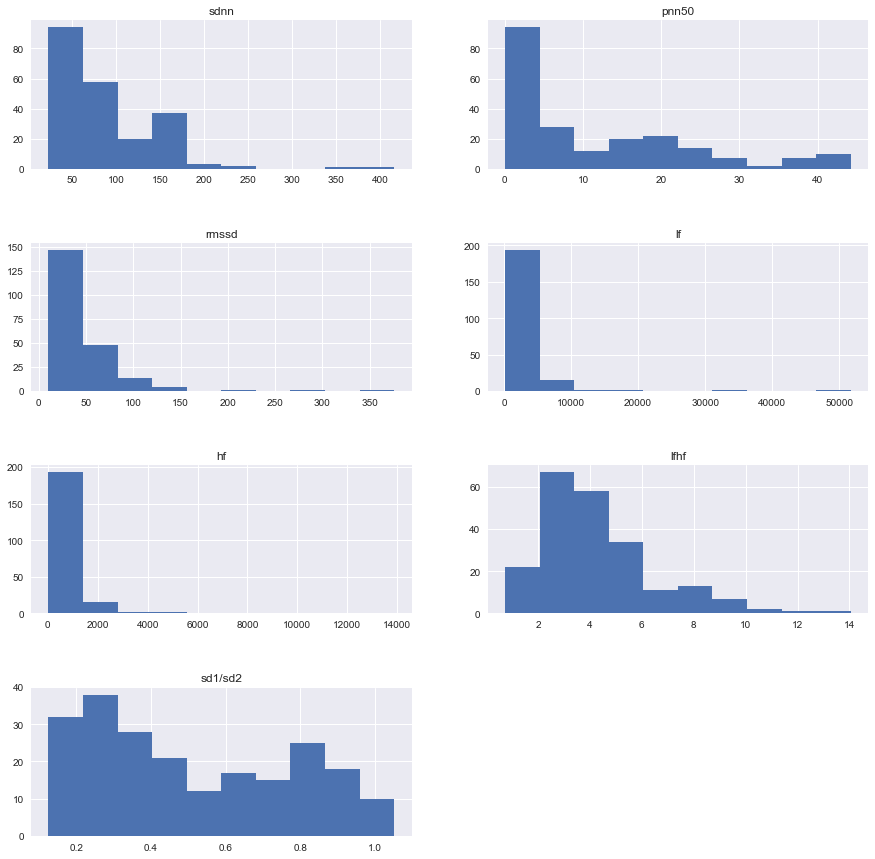

In [846]:
nrows, ncols = 4, 2

fig = plt.figure(figsize=(15,15))    
for i,col in zip(range(1,8), cols):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.set_title(col)
    df[col].hist()
plt.subplots_adjust(hspace = 0.5)
plt.show()

sdnn          Axes(0.125,0.657941;0.227941x0.222059)
pnn50      Axes(0.398529,0.657941;0.227941x0.222059)
rmssd      Axes(0.672059,0.657941;0.227941x0.222059)
lf            Axes(0.125,0.391471;0.227941x0.222059)
hf         Axes(0.398529,0.391471;0.227941x0.222059)
lfhf       Axes(0.672059,0.391471;0.227941x0.222059)
sd1/sd2          Axes(0.125,0.125;0.227941x0.222059)
dtype: object

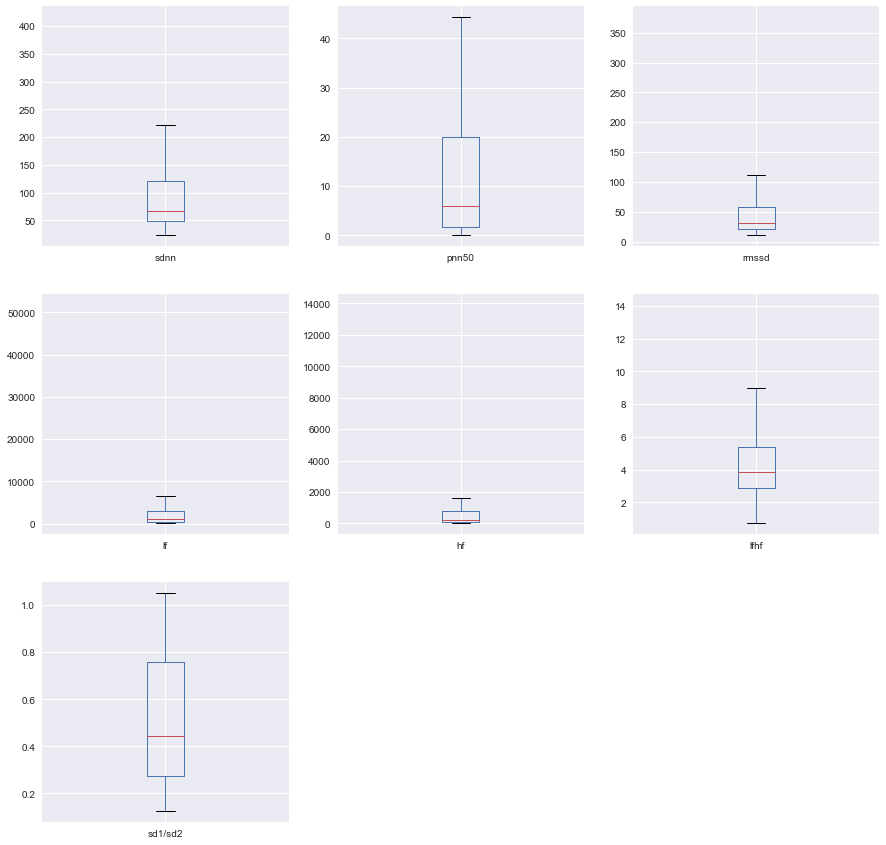

In [847]:
# Box plot

df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))

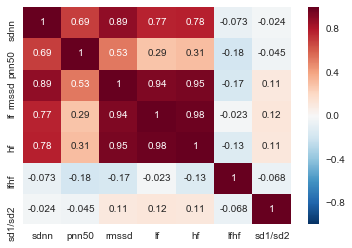

In [848]:
# Correlation plot

Corr=df[df.columns].corr() 
sns.heatmap(Corr, annot=True);

In [849]:
### I'm using a label encoder for the target variable to keep the output in binary form.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [850]:
Class_Encoded = le.fit_transform(df["Class"])

In [851]:
Class_Encoded

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Encoded_Target_Variables:

### A = 0
### N = 1

In [852]:
### Dropped the categorical dependant target

df = df.drop(["Class"], axis=1) 

In [853]:
### Adding the encoded target variable

df["Class_Enc"] = Class_Encoded

In [854]:
df

,sdnn,pnn50,rmssd,lf,hf,lfhf,sd1/sd2,Class_Enc
0,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.322117,0
1,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.261561,0
2,161.341067,44.251683,83.978694,5116.245854,1149.991293,4.448943,0.290226,0
3,150.306617,36.904762,81.739520,4486.273031,1990.905949,2.253383,0.283063,1
4,238.836996,41.322314,102.662892,5023.556550,2027.037377,2.478275,0.268786,1
5,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.814668,0
6,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.835115,0
7,161.341067,44.251683,83.978694,5116.245854,1149.991293,4.448943,0.831536,0
8,142.441893,39.865672,69.724083,3493.622711,883.805700,3.952931,0.892790,0
9,158.263892,39.746479,75.803025,5215.421968,943.577604,5.527285,0.796998,0


### Now, let's visualize to better understand the data.

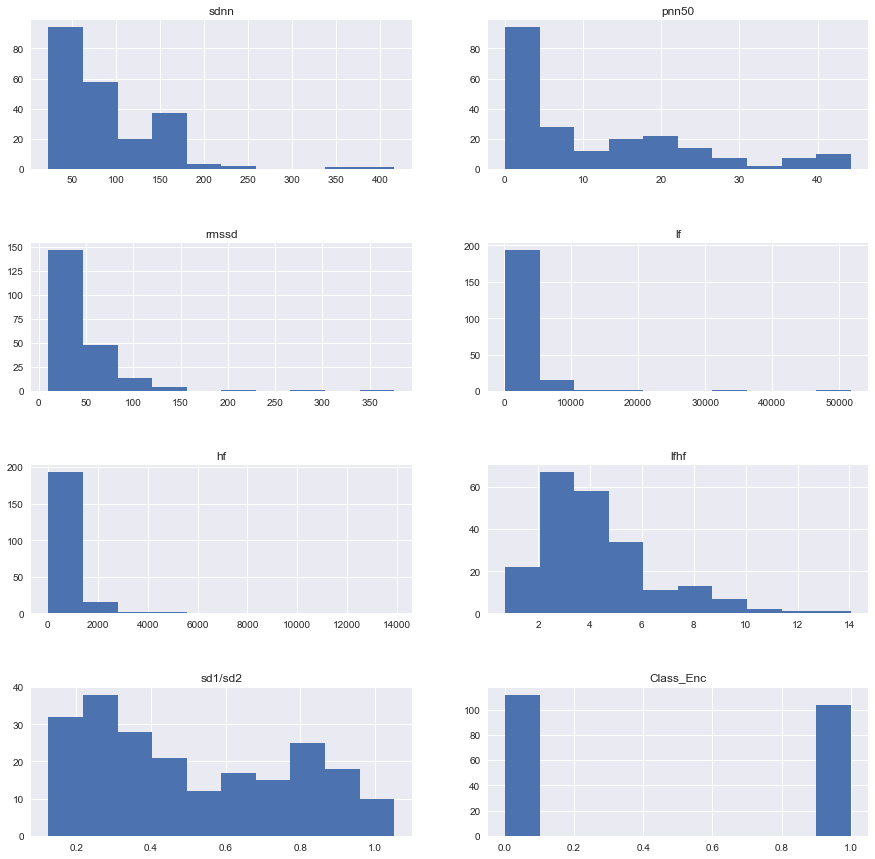

In [855]:
nrows, ncols = 4, 2

fig = plt.figure(figsize=(15,15))    
for i,col in zip(range(1,9), df.columns):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.set_title(col)
    df[col].hist()
plt.subplots_adjust(hspace = 0.5)
plt.show()

sdnn            Axes(0.125,0.657941;0.227941x0.222059)
pnn50        Axes(0.398529,0.657941;0.227941x0.222059)
rmssd        Axes(0.672059,0.657941;0.227941x0.222059)
lf              Axes(0.125,0.391471;0.227941x0.222059)
hf           Axes(0.398529,0.391471;0.227941x0.222059)
lfhf         Axes(0.672059,0.391471;0.227941x0.222059)
sd1/sd2            Axes(0.125,0.125;0.227941x0.222059)
Class_Enc       Axes(0.398529,0.125;0.227941x0.222059)
dtype: object

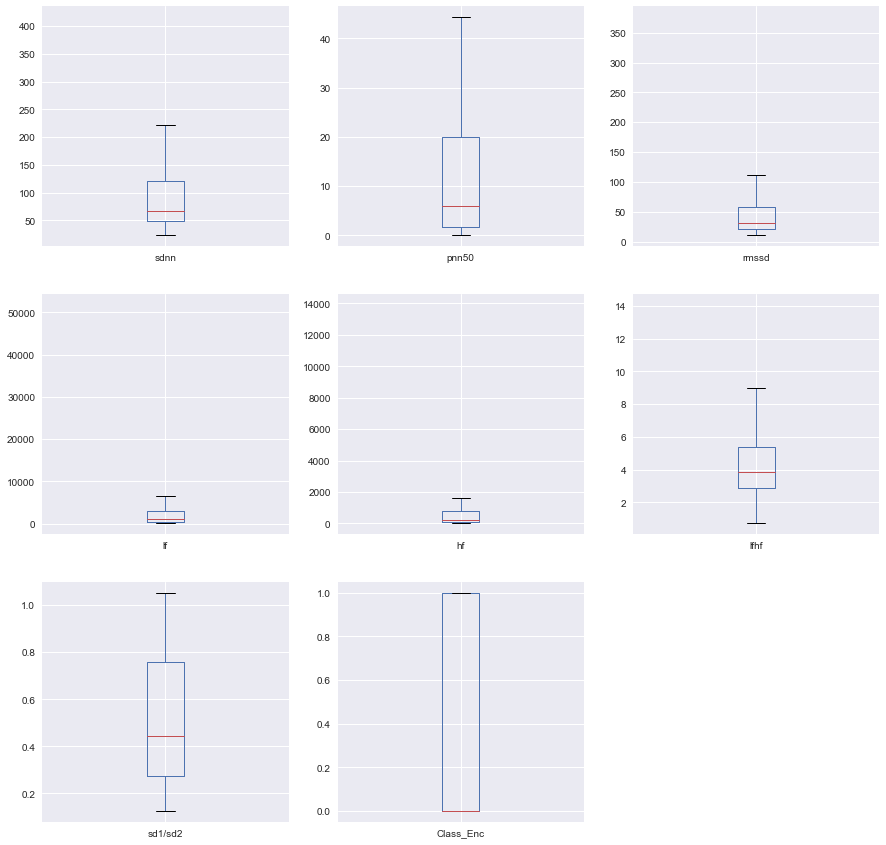

In [856]:
# Box plot

df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))

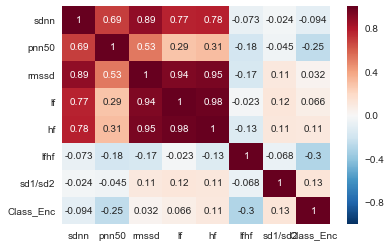

In [857]:
# Correlation plot

Corr=df[df.columns].corr() 
sns.heatmap(Corr, annot=True);

### So, from my analysis I'm able to figure out (with no knowledge about the variables) that: 

* "Mssd" is heavily correlated with "sdnn"

* "lf" and "hf" are heavily dependent upon each other's values. What that means is that a small change in "lf/hf" can trigger a proportional change in "hf/lf" or vice versa.

* "pnn50" affects the class inversely and is most likely to be the deciding factor among all the variables.

* "sd1/sd2" & "hf" still manage to be a deciding factor apart from "pnn50" but "pnn50" greatly affects it.

In [858]:
# Import suite of algorithms.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

In [859]:
# Create objects of required models.
models = []
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("LDA",  LinearDiscriminantAnalysis()))
models.append(("QDA",  QuadraticDiscriminantAnalysis()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear",SVC(kernel="linear")))
models.append(("SVM RBF",SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging",BaggingClassifier()))
models.append(("Calibrated",CalibratedClassifierCV()))
models.append(("GradientBoosting",GradientBoostingClassifier()))
models.append(("LinearSVC",LinearSVC()))
models.append(("Ridge",RidgeClassifier()))

In [860]:
# Split into Input and Output.
attributes = list(df.columns[:7])
X = df[attributes].values 
y= df['Class_Enc'].values

In [861]:
# Scaling the input
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

In [862]:
# Split into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [863]:
# Find accuracy of models.
results = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    results.append(tuple([name,cv_result.mean(), cv_result.std()]))
  
results.sort(key=lambda x: x[1], reverse = True)    
for i in range(len(results)):
    print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))

GradientBoosting     74.48 (+/-) 8.55 
SVM RBF              74.44 (+/-) 11.14 
DecisionTree         73.92 (+/-) 8.28 
SVM Linear           73.86 (+/-) 10.82 
Bagging              73.27 (+/-) 8.34 
LR                   72.71 (+/-) 10.97 
Calibrated           72.71 (+/-) 10.97 
LinearSVC            72.71 (+/-) 9.63 
AdaBoost             71.57 (+/-) 9.00 
KNN                  71.50 (+/-) 11.27 
LDA                  70.39 (+/-) 12.20 
Random Forest        70.39 (+/-) 5.78 
Ridge                70.39 (+/-) 13.54 
QDA                  66.90 (+/-) 10.03 
GNB                  54.61 (+/-) 12.38 


## The best model to use is the Gradient Boosting Classifier which shows an accuracy of 74.48%

## Now, let's finalize the model and check out the predictions.

In [864]:
# Predict output for test set. 
final_model = GradientBoostingClassifier(n_estimators=200)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [865]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(cf)

Confusion matrix: 
[[17 10]
 [ 7 10]]


In [866]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100)

Accuracy Score:  61.3636363636


In [867]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.71      0.63      0.67        27
          1       0.50      0.59      0.54        17

avg / total       0.63      0.61      0.62        44



### CONCLUSION:

* I have obtained a model accuracy of 61.36 % using the test data which is again derived from the given data-set.

* Classification precision average score of 63% , which I believe is considerably good without any feature engineering.

* Feature Engineering requires the parameters (columns) in the given set to in order to tweak them.

# Used Gradient Boosting Classifier to classify the given set.